# Project Burnup Chart
## inf4RAG - Optimizing Cloud-Based Inference for RAG and Agentic Workloads

**Total Sprints**: 6  
**Current Status**: Sprint 1


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 7)


In [5]:
# Sprint Configuration
sprints = ['Sprint 1', 'Sprint 2', 'Sprint 3', 'Sprint 4', 'Sprint 5', 'Final']

# Story points per sprint
sprint_sp = [14, 16, 14, 12, 10, 8]  # Total: 74 SP
total_sp = sum(sprint_sp)

# Ideal burnup (cumulative completed at end of each sprint)
ideal_completed = [0]
for sp in sprint_sp:
    ideal_completed.append(ideal_completed[-1] + sp)

# Actual burnup (currently in Sprint 1, 50% complete)
actual_completed = [
    0,      # Start
    7,      # Sprint 1 current (7/14 SP completed)
    None, None, None, None, None  # Future
]

print(f"Total Story Points: {total_sp}")
print(f"Sprint 1 Progress: 7/{sprint_sp[0]} SP (50%)")
print(f"Completed: {actual_completed[1]} SP")


Total Story Points: 74
Sprint 1 Progress: 7/14 SP (50%)
Completed: 7 SP


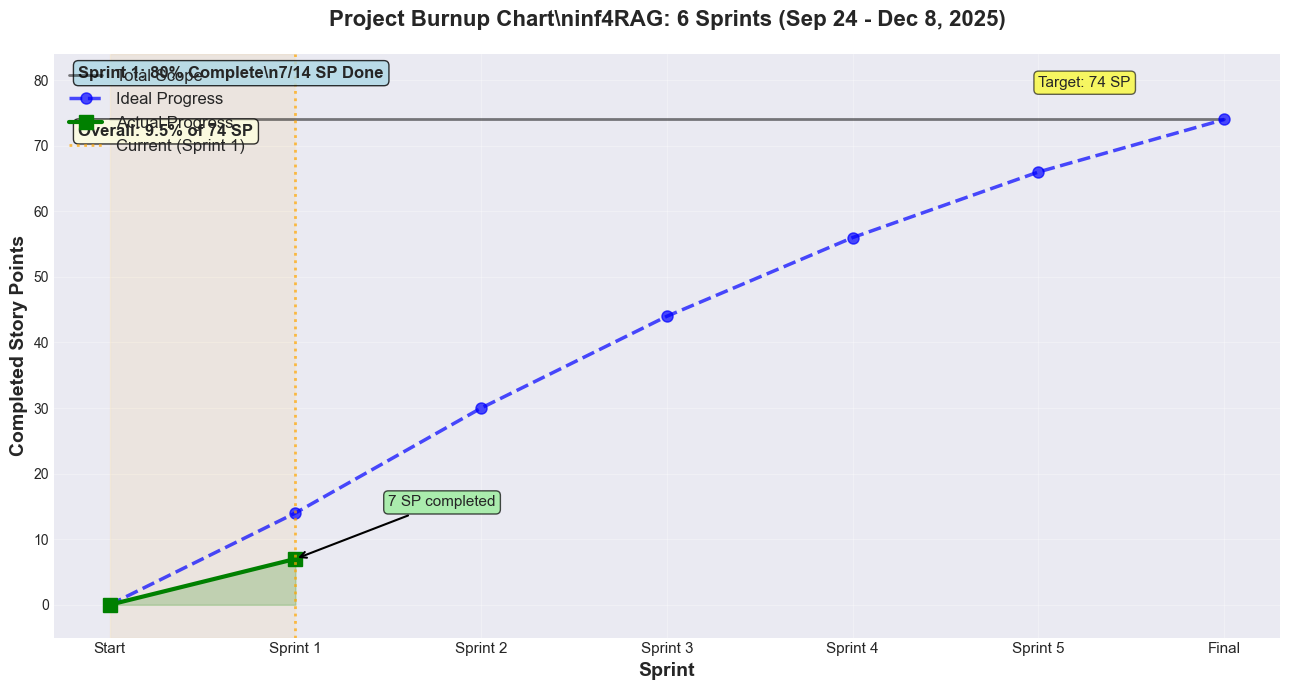

In [9]:
# Create burnup chart
fig, ax = plt.subplots(figsize=(13, 7))

x_positions = list(range(7))  # 0-6 (Start + 6 sprints)
x_labels = ['Start'] + sprints

# Plot total scope line (target)
total_line = [total_sp] * len(x_positions)
ax.plot(x_positions, total_line, 'k-', linewidth=2, 
        label='Total Scope', alpha=0.5)

# Plot ideal line
ax.plot(x_positions, ideal_completed, 'b--', linewidth=2.5, 
        marker='o', markersize=8, label='Ideal Progress', alpha=0.7)

# Plot actual line
actual_x = [i for i, val in enumerate(actual_completed) if val is not None]
actual_y = [val for val in actual_completed if val is not None]
ax.plot(actual_x, actual_y, 'g-', linewidth=3, 
        marker='s', markersize=10, label='Actual Progress')

# Fill area under actual line
ax.fill_between(actual_x, actual_y, alpha=0.2, color='green')

# Mark current position
ax.axvline(x=1, color='orange', linestyle=':', linewidth=2, 
           label='Current (Sprint 1)', alpha=0.7)
ax.axvspan(0, 1, alpha=0.08, color='orange')

# Labels
ax.set_xlabel('Sprint', fontsize=14, fontweight='bold')
ax.set_ylabel('Completed Story Points', fontsize=14, fontweight='bold')
ax.set_title('Project Burnup Chart\\ninf4RAG: 6 Sprints (Sep 24 - Dec 8, 2025)', 
             fontsize=16, fontweight='bold', pad=20)

ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, fontsize=11)
ax.set_ylim(-5, total_sp + 10)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=12, framealpha=0.9)

# Annotations
ax.annotate(f'Target: {total_sp} SP', xy=(6, total_sp), 
            xytext=(5, total_sp + 5), fontsize=11,
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.6))

ax.annotate(f'{actual_y[-1]} SP completed', xy=(1, actual_y[-1]), 
            xytext=(1.5, actual_y[-1] + 8), fontsize=11,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
            arrowprops=dict(arrowstyle='->', lw=1.5))

# Status box
status = f'Sprint 1: 80% Complete\\n7/{sprint_sp[0]} SP Done'
ax.text(0.02, 0.98, status, transform=ax.transAxes,
        fontsize=12, fontweight='bold', verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Overall progress
overall_progress = (actual_y[-1] / total_sp) * 100
ax.text(0.02, 0.88, f'Overall: {overall_progress:.1f}% of {total_sp} SP', 
        transform=ax.transAxes,
        fontsize=12, fontweight='bold', verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()
